<a href="https://colab.research.google.com/github/SuyashPatil-max/UIDAI_repo/blob/main/bio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# !unzip '/content/bio_zip.zip'
df = pd.read_csv('bio.csv')
df.shape

(1861108, 6)

In [33]:
palet =['#240750','#344C64','#577B8D','#57A6A1']

In [34]:
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [35]:
dist = df['district']
df = df.drop('district',axis =1 )
df.head()

,date,state,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,123029,280,577
1,01-03-2025,Bihar,852121,144,369
2,01-03-2025,Jammu and Kashmir,185101,643,1091
3,01-03-2025,Bihar,802158,256,980
4,01-03-2025,Tamil Nadu,625514,271,815


In [36]:
df.duplicated().sum()

np.int64(104507)

In [37]:
df = df.drop_duplicates()

In [38]:
df.shape

(1756601, 5)

In [39]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', dayfirst=True)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
pincode_day = df[['pincode','day']]
df = df.drop(['date','pincode','day'],axis  =1 )

In [40]:
df.head()

,state,bio_age_5_17,bio_age_17_,year,month
0,Haryana,280,577,2025,3
1,Bihar,144,369,2025,3
2,Jammu and Kashmir,643,1091,2025,3
3,Bihar,256,980,2025,3
4,Tamil Nadu,271,815,2025,3


In [41]:
df['state'].unique()

array(['Haryana', 'Bihar', 'Jammu and Kashmir', 'Tamil Nadu',
       'Maharashtra', 'Gujarat', 'Odisha', 'West Bengal', 'Kerala',
       'Rajasthan', 'Punjab', 'Himachal Pradesh', 'Uttar Pradesh',
       'Assam', 'Uttarakhand', 'Madhya Pradesh', 'Karnataka',
       'Andhra Pradesh', 'Telangana', 'Goa', 'Nagaland', 'Jharkhand',
       'Delhi', 'Chhattisgarh', 'Meghalaya', 'Chandigarh', 'Orissa',
       'Puducherry', 'Pondicherry', 'Manipur', 'Sikkim', 'Tripura',
       'Mizoram', 'Arunachal Pradesh', 'Ladakh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman and Diu',
       'Andaman and Nicobar Islands', 'Andaman & Nicobar Islands',
       'Dadra and Nagar Haveli', 'Lakshadweep', 'Daman & Diu',
       'Dadra & Nagar Haveli', 'Jammu & Kashmir', 'WESTBENGAL',
       'andhra pradesh', 'Westbengal', 'West  Bengal', 'WEST BENGAL',
       'West Bangal', 'ODISHA', 'odisha', 'West bengal', 'west Bengal',
       'Uttaranchal', 'Chhatisgarh', 'Tamilnadu'], dtype=object)

In [42]:
df['state'] = df['state'].replace({
    'ODISHA':'Odisha',
    'Orissa' : 'Odisha',
    'Chhattisgarh' : 'CG',
    'Chhatisgarh' :'CG',
    'odisha' : 'Odisha',
    'Pondicherry' :  'Puducherry',
    'Dadra and Nagar Haveli and Daman and Diu' : 'DnH_DnD',
    'Daman and Diu' : 'DnH_DnD' ,
    'Dadra and Nagar Haveli' :'DnH_DnD' ,
    'Daman & Diu' : 'DnH_DnD',
    'Dadra & Nagar Haveli' : 'DnH_DnD' ,
    'Andhra Pradesh' : 'AP' ,
    'andhra pradesh' : 'AP',
    'Andaman and Nicobar Islands' : 'A&N_I',
    'Andaman & Nicobar Islands' : 'A&N_I',

})

In [43]:
df['state'] = df['state'].replace({
    'Jammu and Kashmir' : 'J&K',
    'Jammu & Kashmir' : 'J&K',
    'Tamil Nadu' : 'TN',
    'Tamilnadu' : 'TN',
    'Karnataka' : 'KA',
    'Maharashtra' : 'MH',
    'Rajasthan' : 'RJ',
    'Himachal Pradesh' :'HP',
    'Uttar Pradesh' : 'UP',
    'Uttarakhand' : 'UK',
    'Madhya Pradesh' :'MP',
    'Uttaranchal' : 'UK',
    'Jharkhand' : 'JK'
})
df['state'] = df['state'].replace(['West Bengal','WESTBENGAL','Westbengal','West  Bengal','WEST BENGAL',
     'West Bangal','West bengal','WEST BENGAL','West Bangal','West bengal','west Bengal'],'WB')

In [44]:
df['state'].unique()

array(['Haryana', 'Bihar', 'J&K', 'TN', 'MH', 'Gujarat', 'Odisha', 'WB',
       'Kerala', 'RJ', 'Punjab', 'HP', 'UP', 'Assam', 'UK', 'MP', 'KA',
       'AP', 'Telangana', 'Goa', 'Nagaland', 'JK', 'Delhi', 'CG',
       'Meghalaya', 'Chandigarh', 'Puducherry', 'Manipur', 'Sikkim',
       'Tripura', 'Mizoram', 'Arunachal Pradesh', 'Ladakh', 'DnH_DnD',
       'A&N_I', 'Lakshadweep'], dtype=object)

In [45]:
df['state'].unique().shape

(36,)

In [46]:
df['total_age'] = df['bio_age_5_17'] + df['bio_age_17_']

In [47]:
south = ['MH','KA','TN','AP','Telangana','Kerala','Gujarat','Goa']
terr = ['Delhi','A&N_I','Ladakh','Puducherry','DnH_DnD', 'Ladakh', 'Lakshadweep','Chandigarh']
sisters = [ 'Assam', 'Tripura','Manipur','Meghalaya','Arunachal Pradesh','Nagaland','Mizoram','Sikkim']
north = []
top_terr = south + terr + sisters
for i in df['state'].value_counts().index :
  if i in top_terr :
    pass
  else :
    north.append(i)

In [48]:
north

['UP',
 'WB',
 'Odisha',
 'Bihar',
 'RJ',
 'MP',
 'Punjab',
 'JK',
 'CG',
 'HP',
 'Haryana',
 'UK',
 'J&K']

In [49]:
south_mask = df['state'].isin(south)
terr_mask = df['state'].isin(terr)
sisters_mask = df['state'].isin(sisters)
north_mask = df['state'].isin(north)

In [50]:
df_south = df[south_mask]
df_north = df[north_mask]
df_sisters = df[sisters_mask]
df_terr = df[terr_mask]

/tmp/ipython-input-1002381948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'bio_age_17_',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-1002381948.py:3: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'bio_age_17_',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-1002381948.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


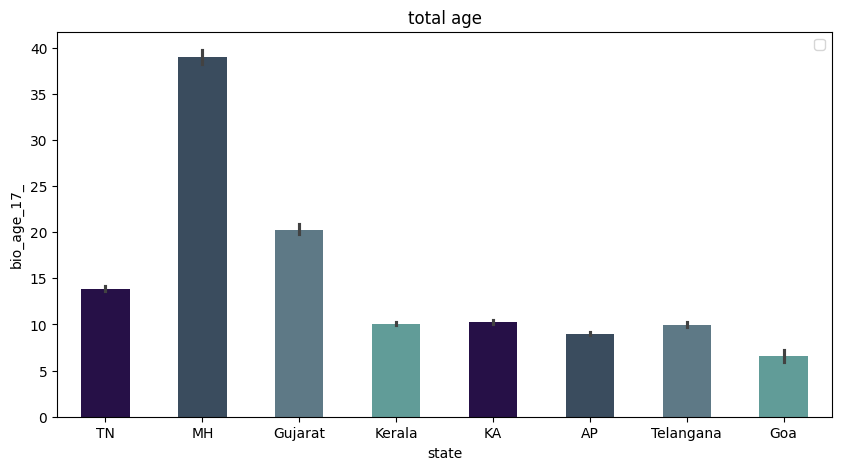

/tmp/ipython-input-1002381948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'bio_age_17_',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-1002381948.py:3: UserWarning: 
The palette list has fewer values (4) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'bio_age_17_',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-1002381948.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


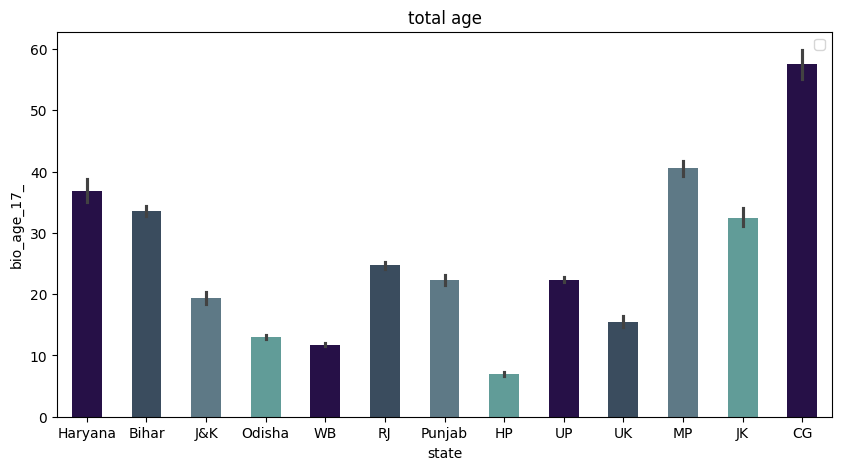

/tmp/ipython-input-1002381948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'bio_age_17_',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-1002381948.py:3: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'bio_age_17_',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-1002381948.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


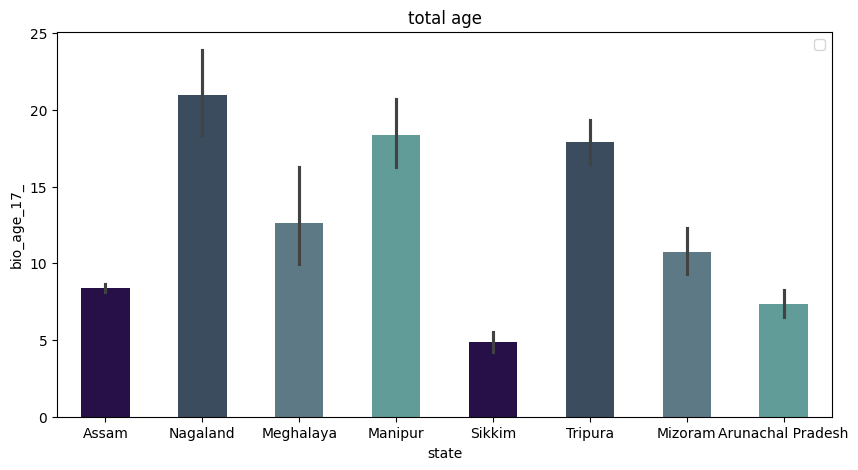

/tmp/ipython-input-1002381948.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y='bio_age_17_',data = df_terr,palette = palet,width=0.5)
/tmp/ipython-input-1002381948.py:9: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y='bio_age_17_',data = df_terr,palette = palet,width=0.5)
/tmp/ipython-input-1002381948.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


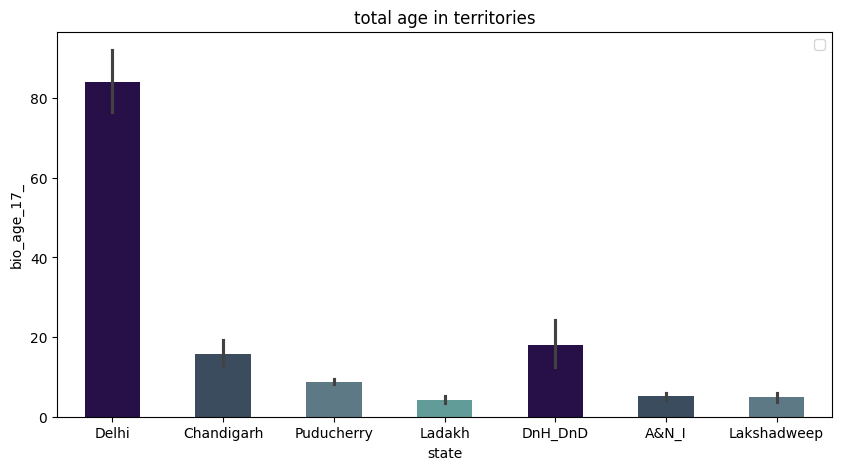

In [51]:
for X in df_south ,df_north ,df_sisters  :
  plt.figure(figsize=(10,5))
  sns.barplot(x = 'state', y= 'bio_age_17_',data = X ,palette =palet,width=0.5)
  plt.legend()
  plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x = 'state', y='bio_age_17_',data = df_terr,palette = palet,width=0.5)
plt.legend()
plt.show()

/tmp/ipython-input-3981620881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'bio_age_5_17',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-3981620881.py:3: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'bio_age_5_17',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-3981620881.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


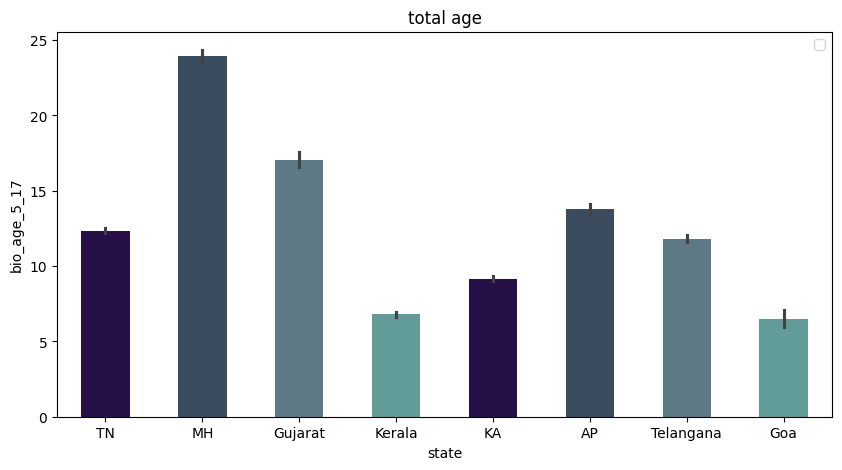

/tmp/ipython-input-3981620881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'bio_age_5_17',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-3981620881.py:3: UserWarning: 
The palette list has fewer values (4) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'bio_age_5_17',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-3981620881.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


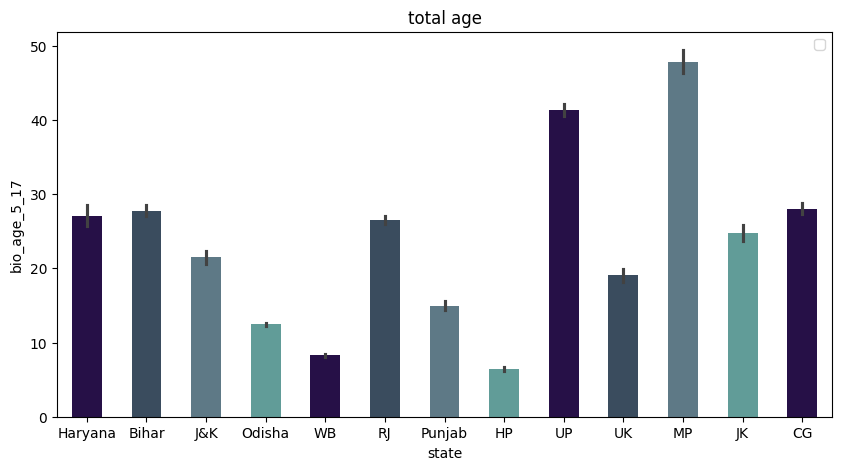

/tmp/ipython-input-3981620881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'bio_age_5_17',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-3981620881.py:3: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'bio_age_5_17',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-3981620881.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


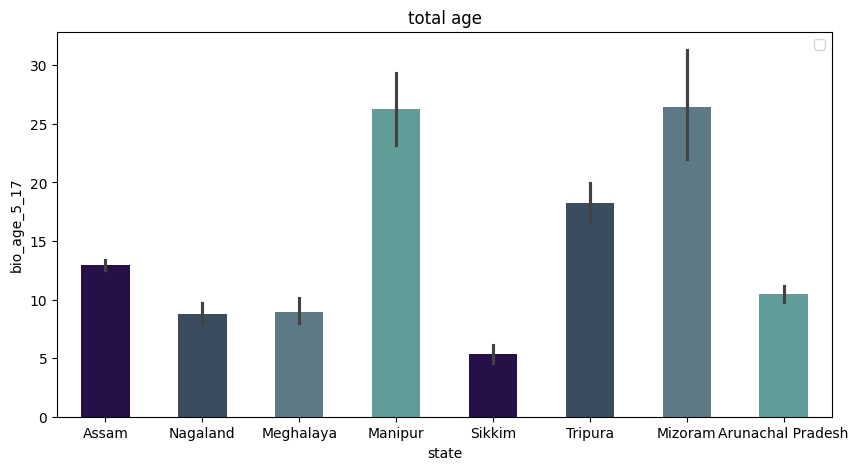

/tmp/ipython-input-3981620881.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'bio_age_5_17',data = df_terr,palette =palet,width=0.5)
/tmp/ipython-input-3981620881.py:9: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'bio_age_5_17',data = df_terr,palette =palet,width=0.5)
/tmp/ipython-input-3981620881.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


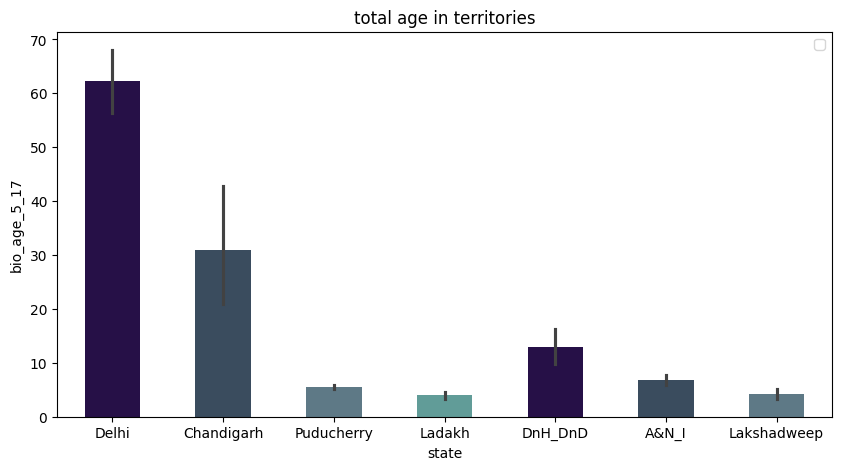

In [52]:
for X in df_south ,df_north ,df_sisters  :
  plt.figure(figsize=(10,5))
  sns.barplot(x = 'state', y= 'bio_age_5_17',data = X ,palette =palet,width=0.5)
  plt.legend()
  plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x = 'state', y= 'bio_age_5_17',data = df_terr,palette =palet,width=0.5)
plt.legend()
plt.show()

In [53]:
df['regions'] = df['state']
df['regions'] = df['regions'].replace(south,'south_region')
df['regions'] = df['regions'].replace(sisters,'sisters_region')
df['regions'] = df['regions'].replace(terr,'territories_region')
df['regions'] = df['regions'].replace(north,'north_region')

In [54]:
df.head()

,state,bio_age_5_17,bio_age_17_,year,month,total_age,regions
0,Haryana,280,577,2025,3,857,north_region
1,Bihar,144,369,2025,3,513,north_region
2,J&K,643,1091,2025,3,1734,north_region
3,Bihar,256,980,2025,3,1236,north_region
4,TN,271,815,2025,3,1086,south_region


/tmp/ipython-input-1434876682.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'regions',y ='total_age',palette =palet,data =df )
/tmp/ipython-input-1434876682.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


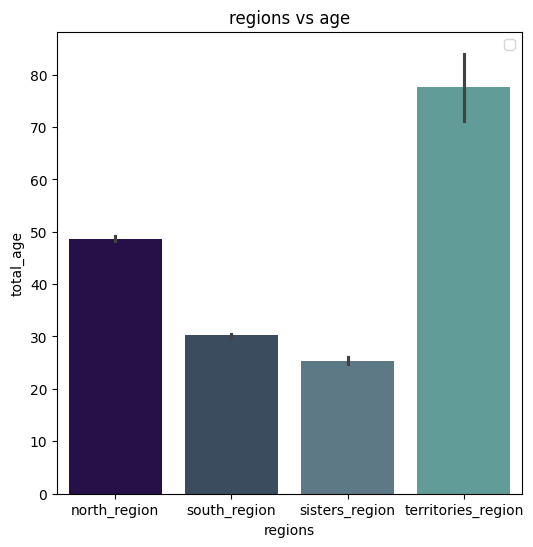

In [55]:
plt.figure(figsize=(6,6))
sns.barplot(x= 'regions',y ='total_age',palette =palet,data =df )
plt.legend()
plt.title('regions vs age')
plt.show()

In [56]:
df['youth_ratio'] = df['bio_age_5_17']/df['bio_age_17_']
df.head()

,state,bio_age_5_17,bio_age_17_,year,month,total_age,regions,youth_ratio
0,Haryana,280,577,2025,3,857,north_region,0.485269
1,Bihar,144,369,2025,3,513,north_region,0.390244
2,J&K,643,1091,2025,3,1734,north_region,0.589368
3,Bihar,256,980,2025,3,1236,north_region,0.261224
4,TN,271,815,2025,3,1086,south_region,0.332515


/tmp/ipython-input-72102113.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'regions',y ='youth_ratio',palette =palet,data =df)
/tmp/ipython-input-72102113.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


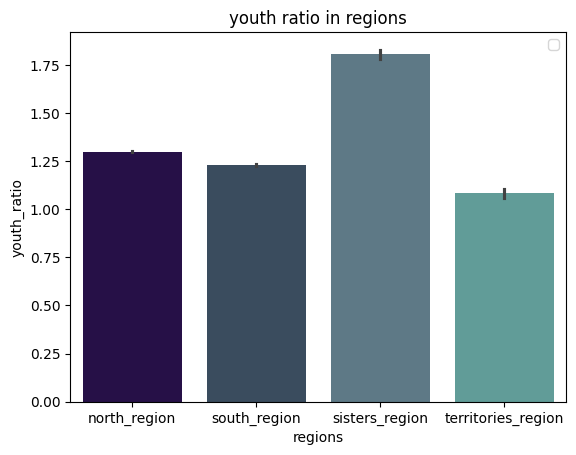

In [57]:
sns.barplot(x= 'regions',y ='youth_ratio',palette =palet,data =df)
plt.legend()
plt.title('youth ratio in regions')
plt.show()

/tmp/ipython-input-2845954355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['youth_ratio'] = X['bio_age_5_17']/X['bio_age_17_']
/tmp/ipython-input-2845954355.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'youth_ratio',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-2845954355.py:4: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'youth_ratio',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-2845954355.py:6: UserWarning: No artists with labels found 

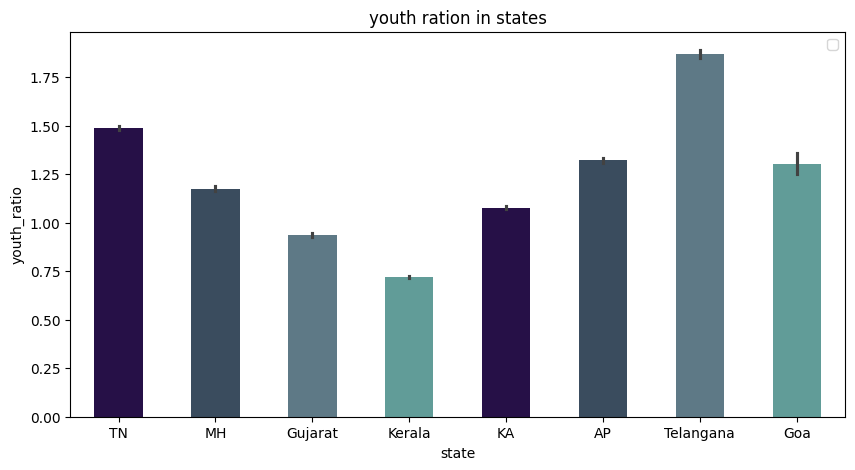

/tmp/ipython-input-2845954355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['youth_ratio'] = X['bio_age_5_17']/X['bio_age_17_']
/tmp/ipython-input-2845954355.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'youth_ratio',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-2845954355.py:4: UserWarning: 
The palette list has fewer values (4) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'youth_ratio',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-2845954355.py:6: UserWarning: No artists with labels found

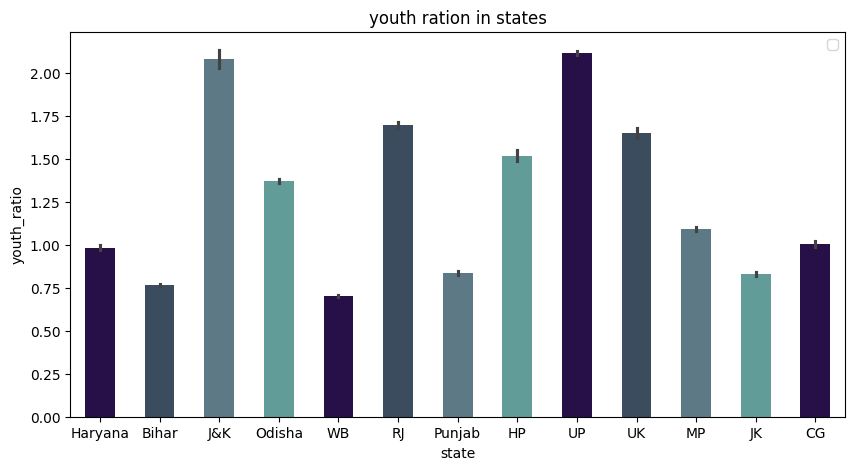

/tmp/ipython-input-2845954355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['youth_ratio'] = X['bio_age_5_17']/X['bio_age_17_']
/tmp/ipython-input-2845954355.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'youth_ratio',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-2845954355.py:4: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'youth_ratio',data = X ,palette =palet,width=0.5)
/tmp/ipython-input-2845954355.py:6: UserWarning: No artists with labels found 

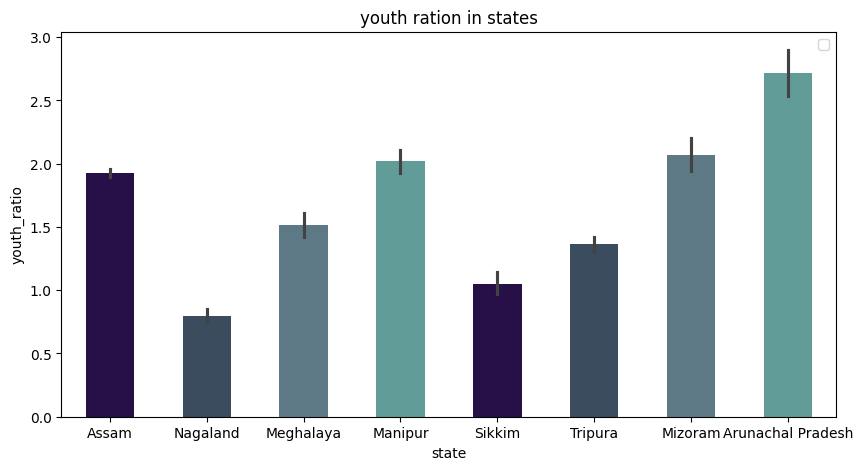

/tmp/ipython-input-2845954355.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_terr['youth_ratio'] = df_terr['bio_age_5_17']/df_terr['bio_age_17_']
/tmp/ipython-input-2845954355.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'state', y= 'youth_ratio',data = df_terr,palette =palet,width=0.5)
/tmp/ipython-input-2845954355.py:11: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'state', y= 'youth_ratio',data = df_terr,palette =palet,width=0.5)
/tmp/ipython-input-2845954355.py:13: UserWarnin

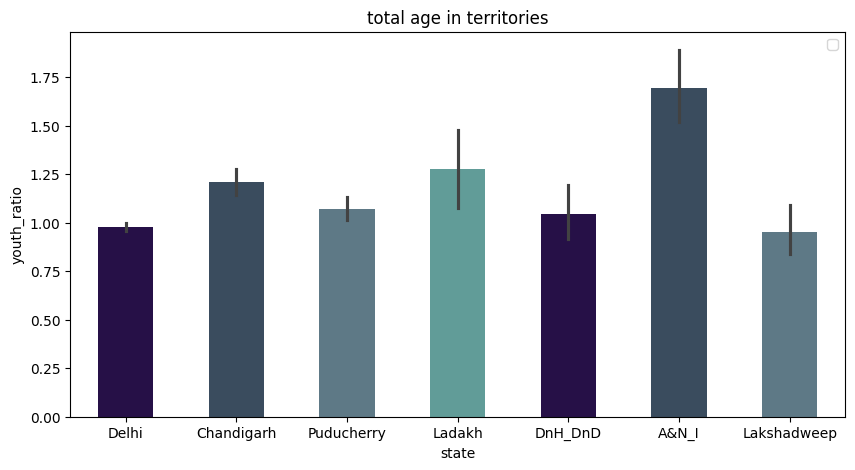

In [58]:
for X in df_south ,df_north ,df_sisters  :
  X['youth_ratio'] = X['bio_age_5_17']/X['bio_age_17_']
  plt.figure(figsize=(10,5))
  sns.barplot(x = 'state', y= 'youth_ratio',data = X ,palette =palet,width=0.5)
  plt.title('youth ration in states')
  plt.legend()
  plt.show()

plt.figure(figsize=(10,5))
df_terr['youth_ratio'] = df_terr['bio_age_5_17']/df_terr['bio_age_17_']
sns.barplot(x = 'state', y= 'youth_ratio',data = df_terr,palette =palet,width=0.5)
plt.title('youth ration in states')
plt.legend()
plt.show()


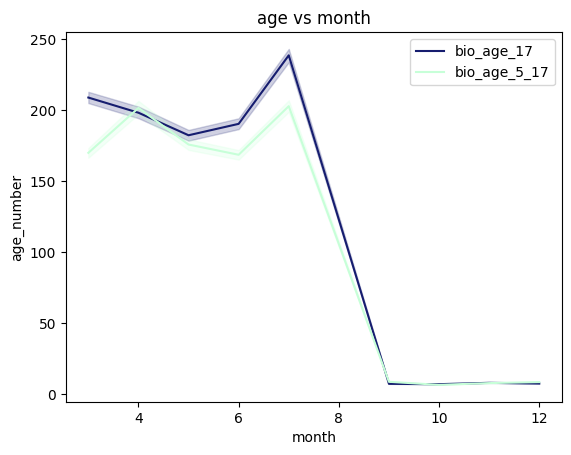

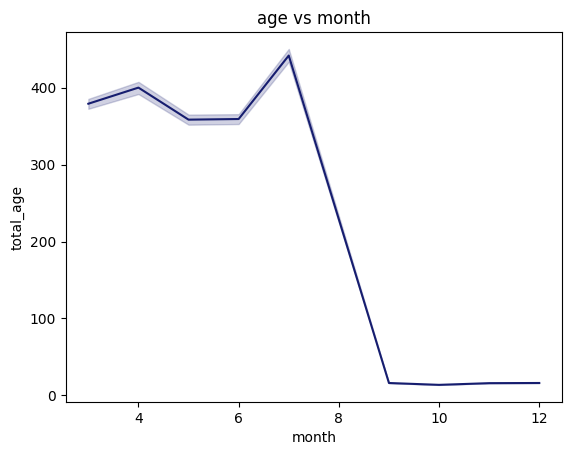

In [59]:
sns.lineplot(x='month',y = 'bio_age_17_',data =df ,color ='#161D6F',label='bio_age_17')
sns.lineplot(x='month',y = 'bio_age_5_17',data =df ,color ='#C7FFD8',label='bio_age_5_17')
plt.legend()
plt.title('age vs month')
plt.ylabel('age_number')
plt.xlabel('month')
plt.show()

sns.lineplot(x='month',y = 'total_age',data =df ,color ='#161D6F')
plt.title('age vs month')
plt.show()

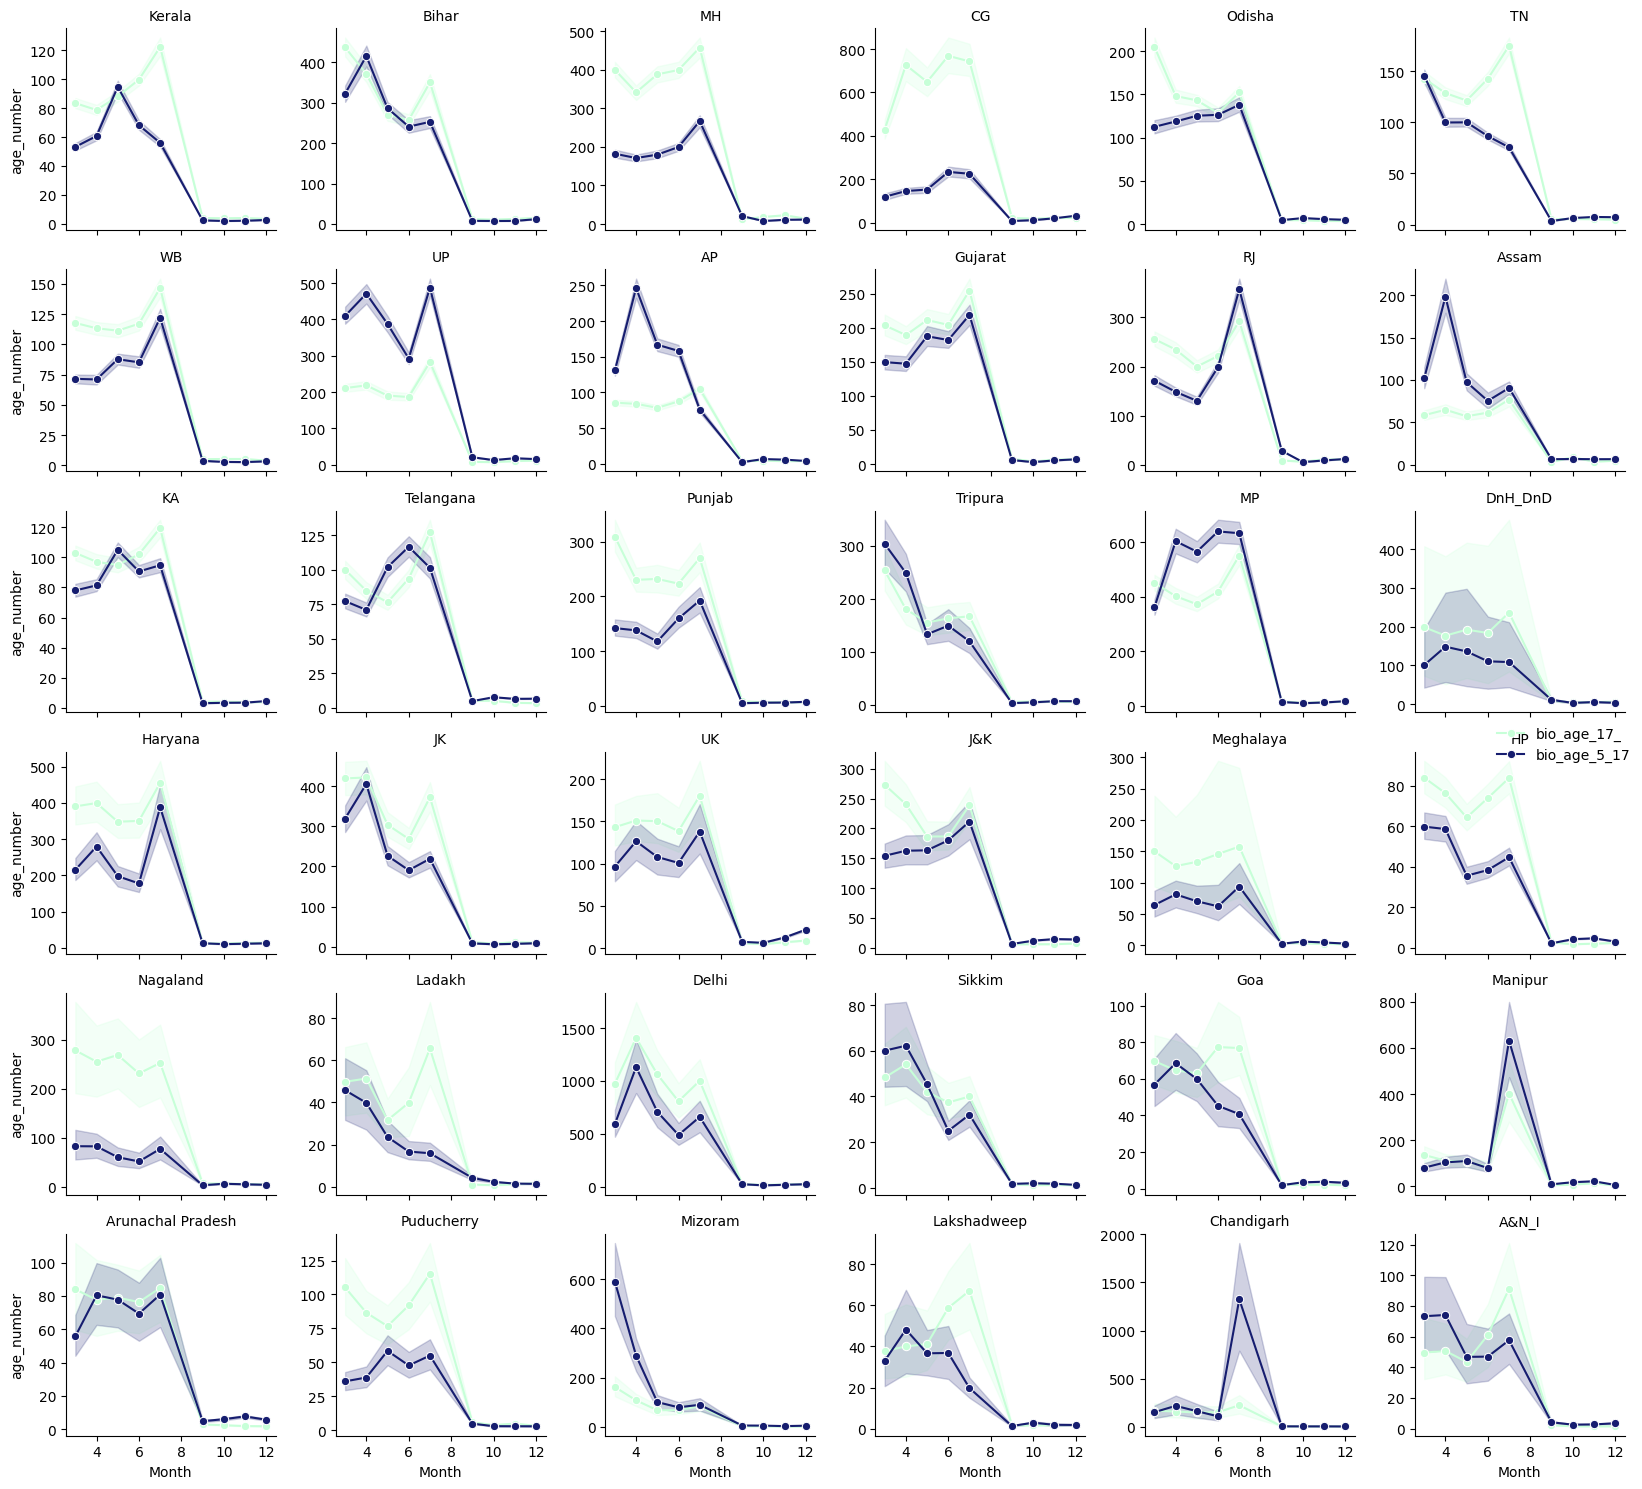

In [60]:
df= df.reset_index()

df_long = df.melt(id_vars=['state', 'month'],value_vars=[ 'bio_age_5_17','bio_age_17_'],var_name='age_group',value_name='enrolled')
df_long = df_long.sort_values('month')

palette = {'bio_age_5_17': '#161D6F','bio_age_17_': '#C7FFD8'}
g = sns.FacetGrid(df_long,col='state',col_wrap=6,height=2.5,sharey=False )
g.map_dataframe(sns.lineplot,x='month',y='enrolled',hue='age_group',marker='o',palette =palette)

g.add_legend()
g.set_axis_labels('Month', 'age_number')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

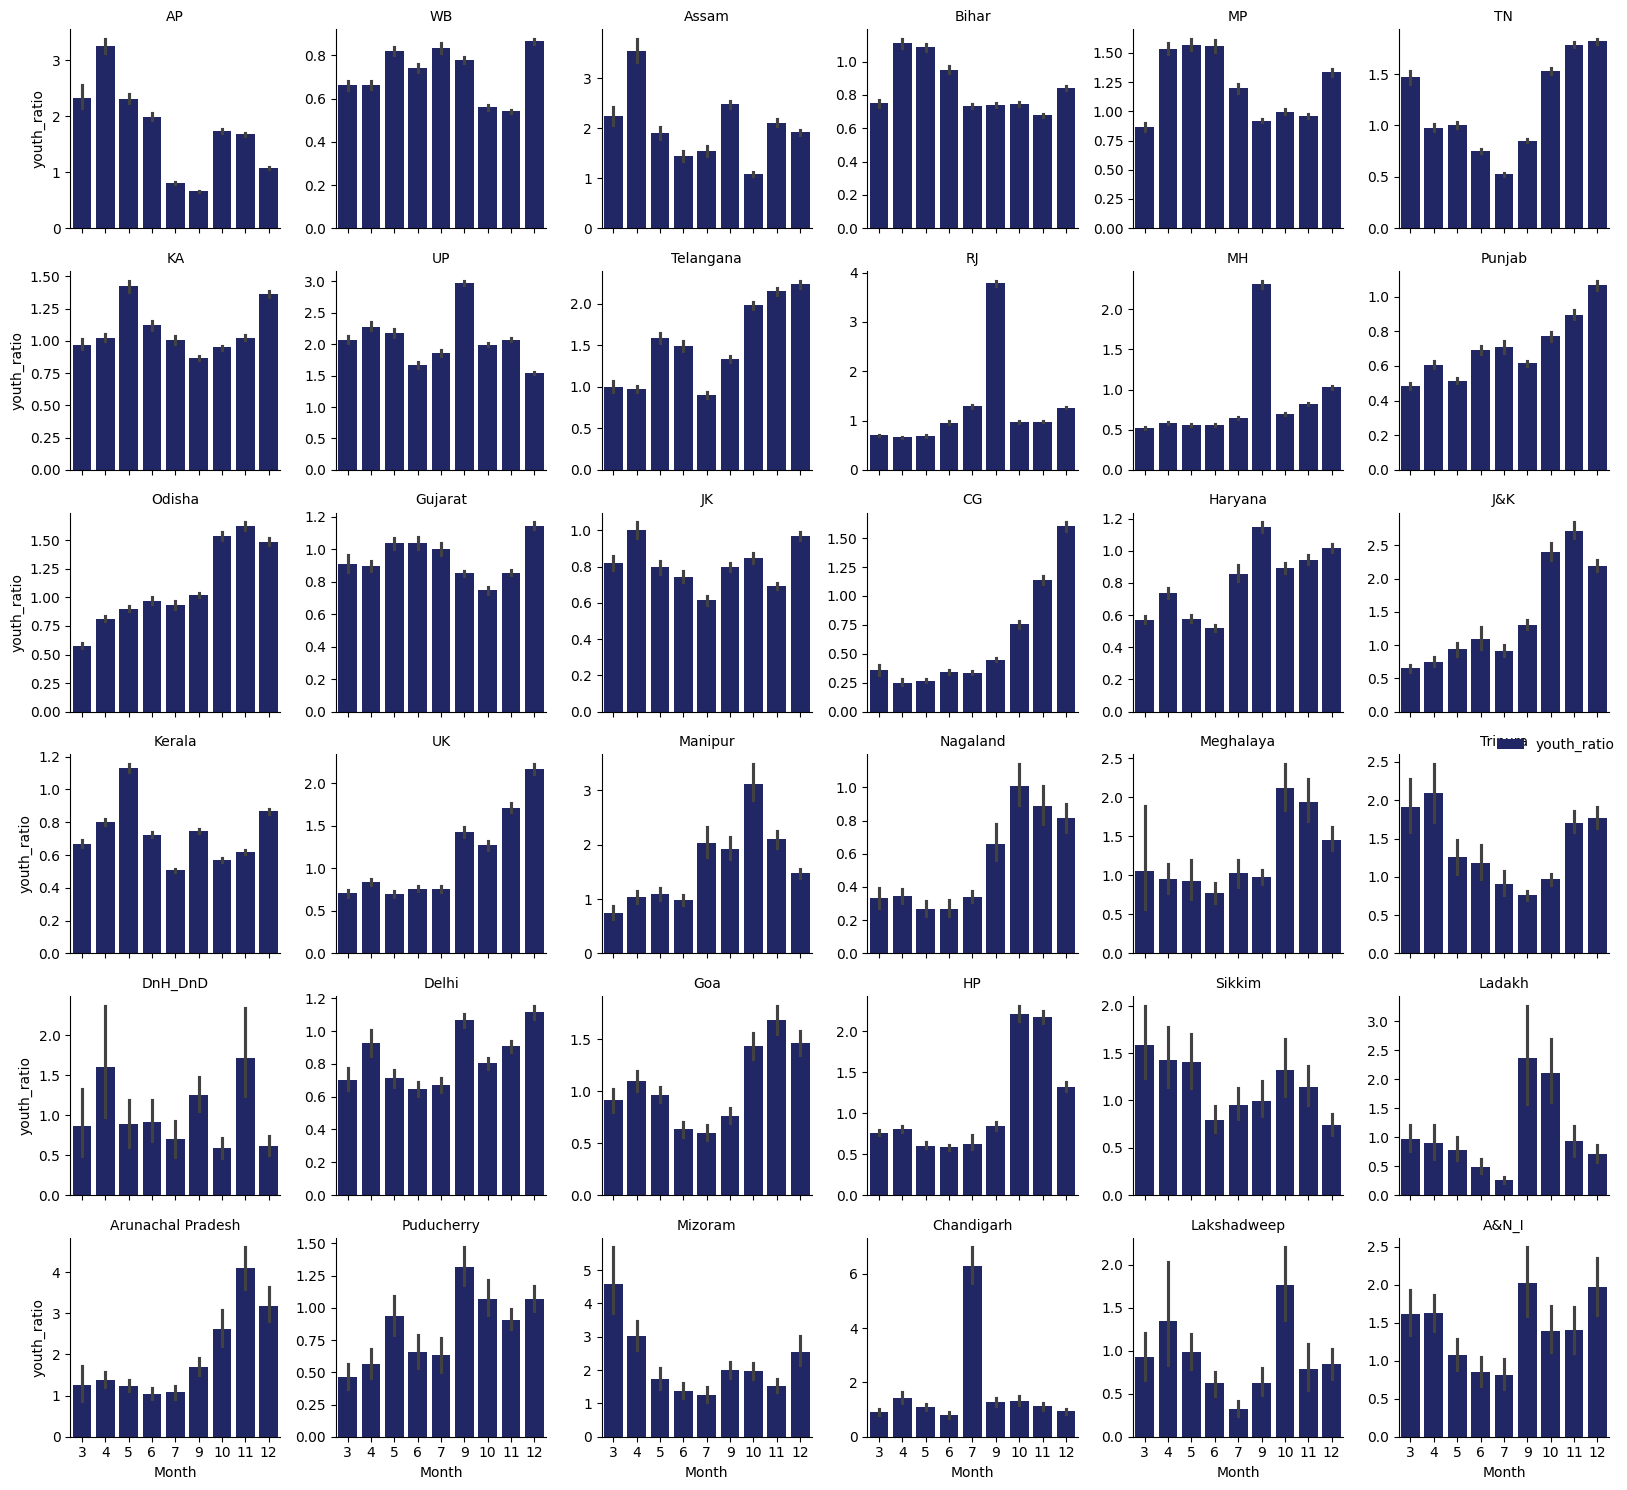

In [62]:
df= df.reset_index()

df_long = df.melt(id_vars=['state', 'month'],value_vars=[ 'youth_ratio'],var_name='age_group',value_name='enrolled')
df_long = df_long.sort_values('month')

palette = {'youth_ratio': '#161D6F'}
g = sns.FacetGrid(df_long,col='state',col_wrap=6,height=2.5,sharey=False )
g.map_dataframe(sns.barplot,x='month',y='enrolled',hue='age_group',palette =palette)

g.add_legend()
g.set_axis_labels('Month', 'youth_ratio')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

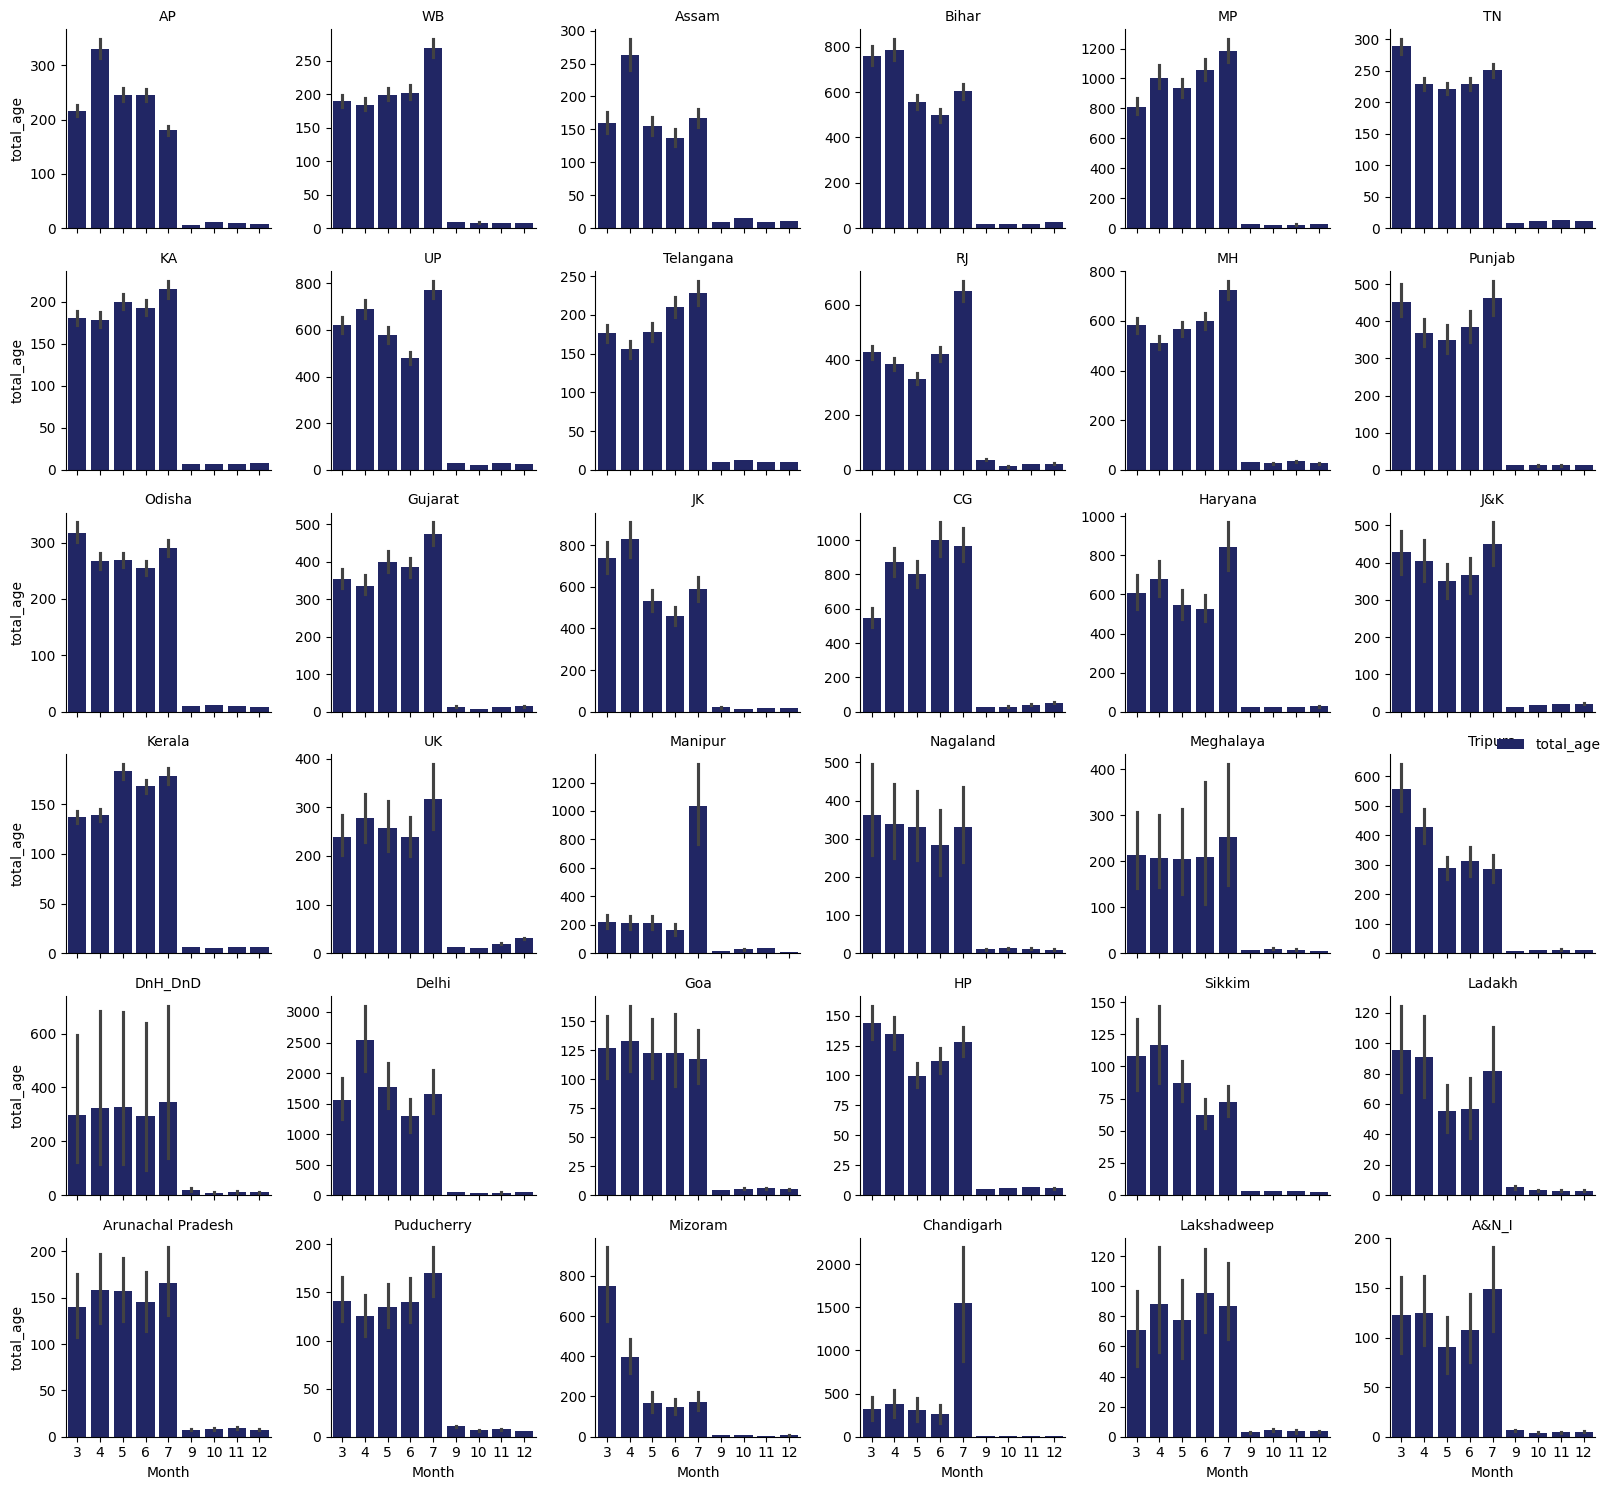

In [63]:
df_long = df.melt(id_vars=['state', 'month'],value_vars=[ 'total_age'],var_name='age_group',value_name='enrolled')
df_long = df_long.sort_values('month')

palette = {'total_age': '#161D6F'}
g = sns.FacetGrid(df_long,col='state',col_wrap=6,height=2.5,sharey=False )
g.map_dataframe(sns.barplot,x='month',y='enrolled',hue='age_group',palette =palette)

g.add_legend()
g.set_axis_labels('Month', 'total_age')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

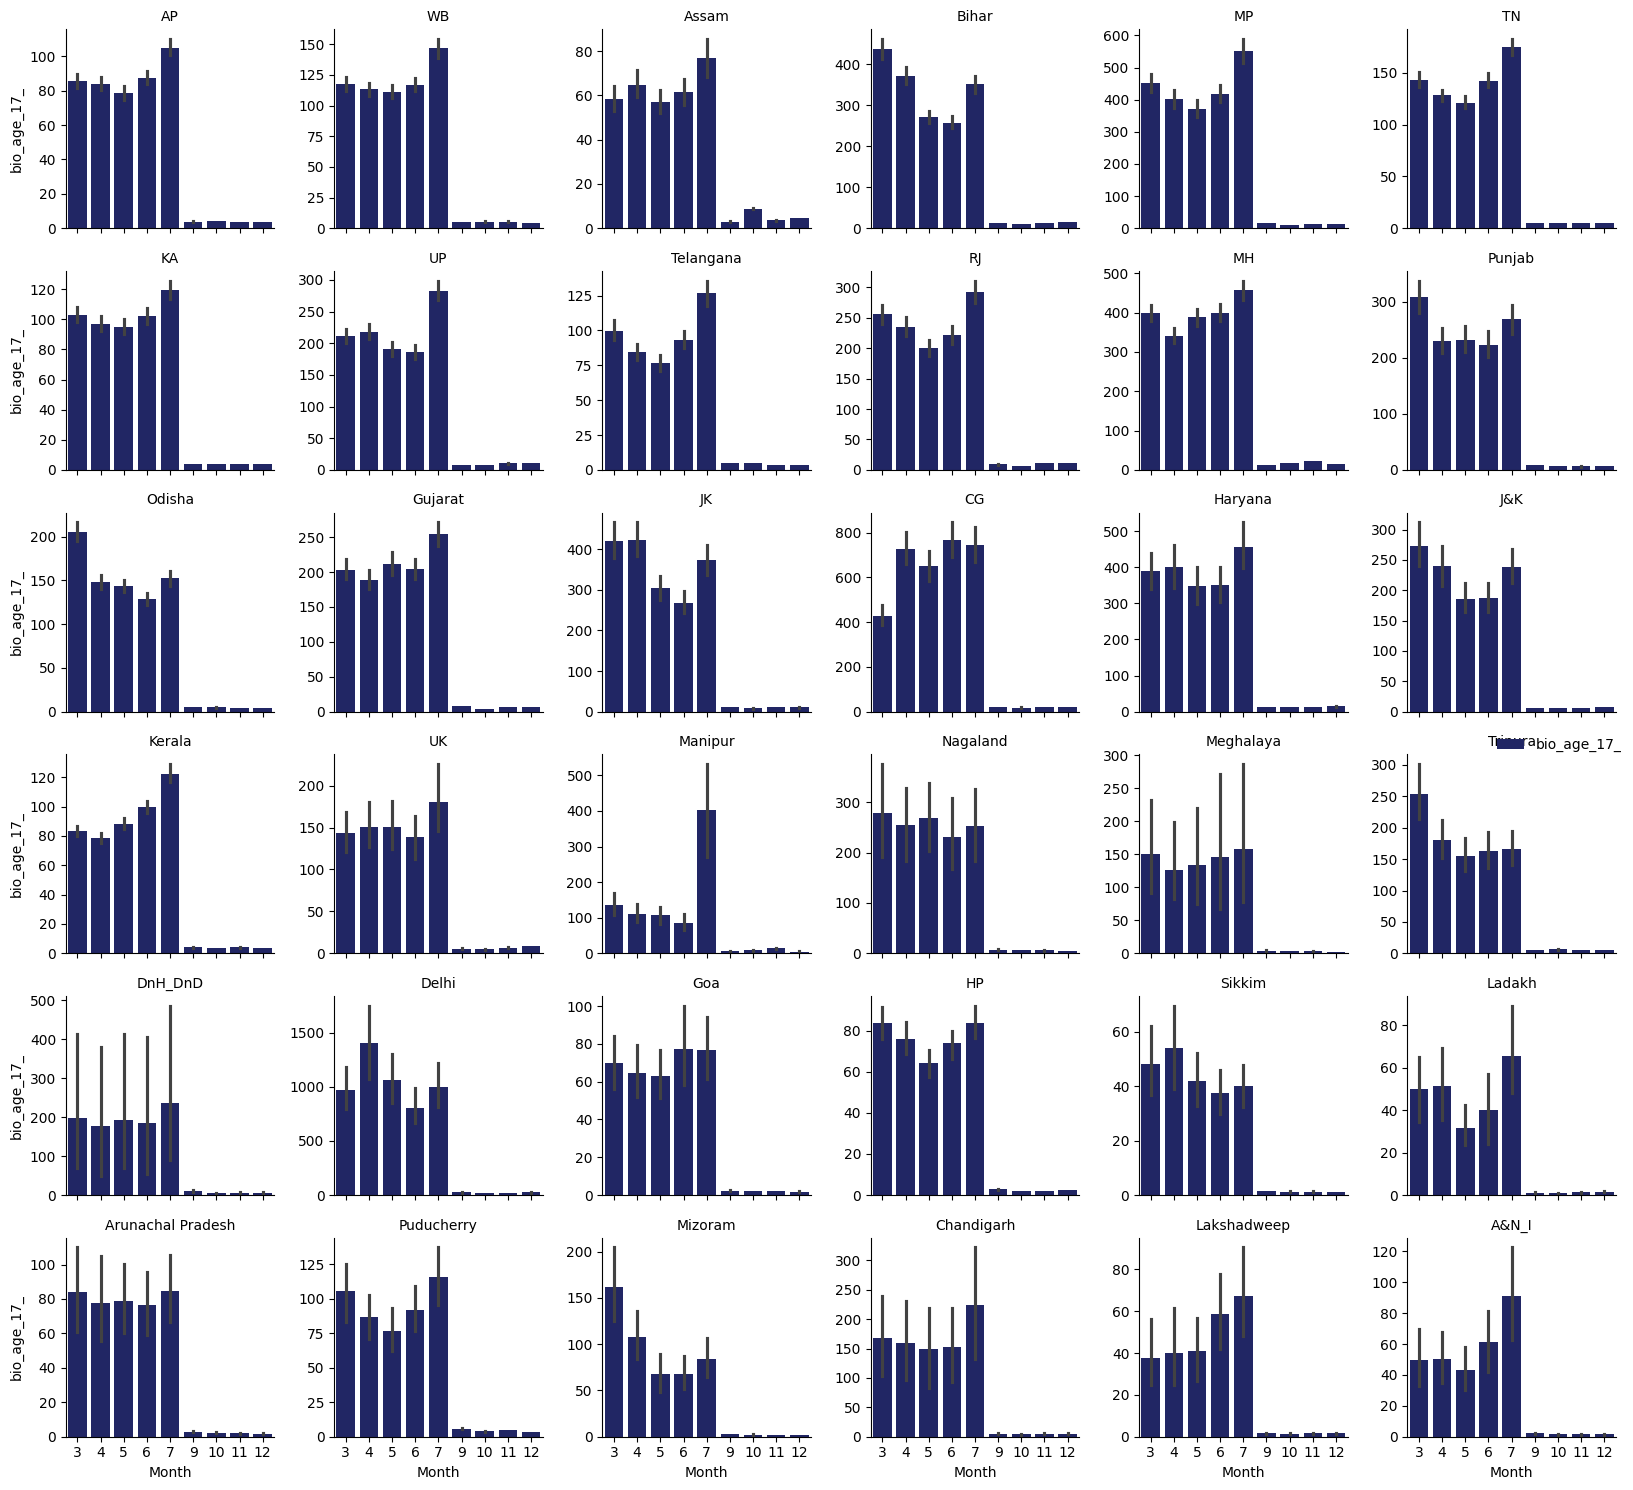

In [64]:
df_long = df.melt(id_vars=['state', 'month'],value_vars=[ 'bio_age_17_'],var_name='age_group',value_name='enrolled')
df_long = df_long.sort_values('month')

palette = {'bio_age_17_': '#161D6F'}
g = sns.FacetGrid(df_long,col='state',col_wrap=6,height=2.5,sharey=False )
g.map_dataframe(sns.barplot,x='month',y='enrolled',hue='age_group',palette =palette)

g.add_legend()
g.set_axis_labels('Month', 'bio_age_17_')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

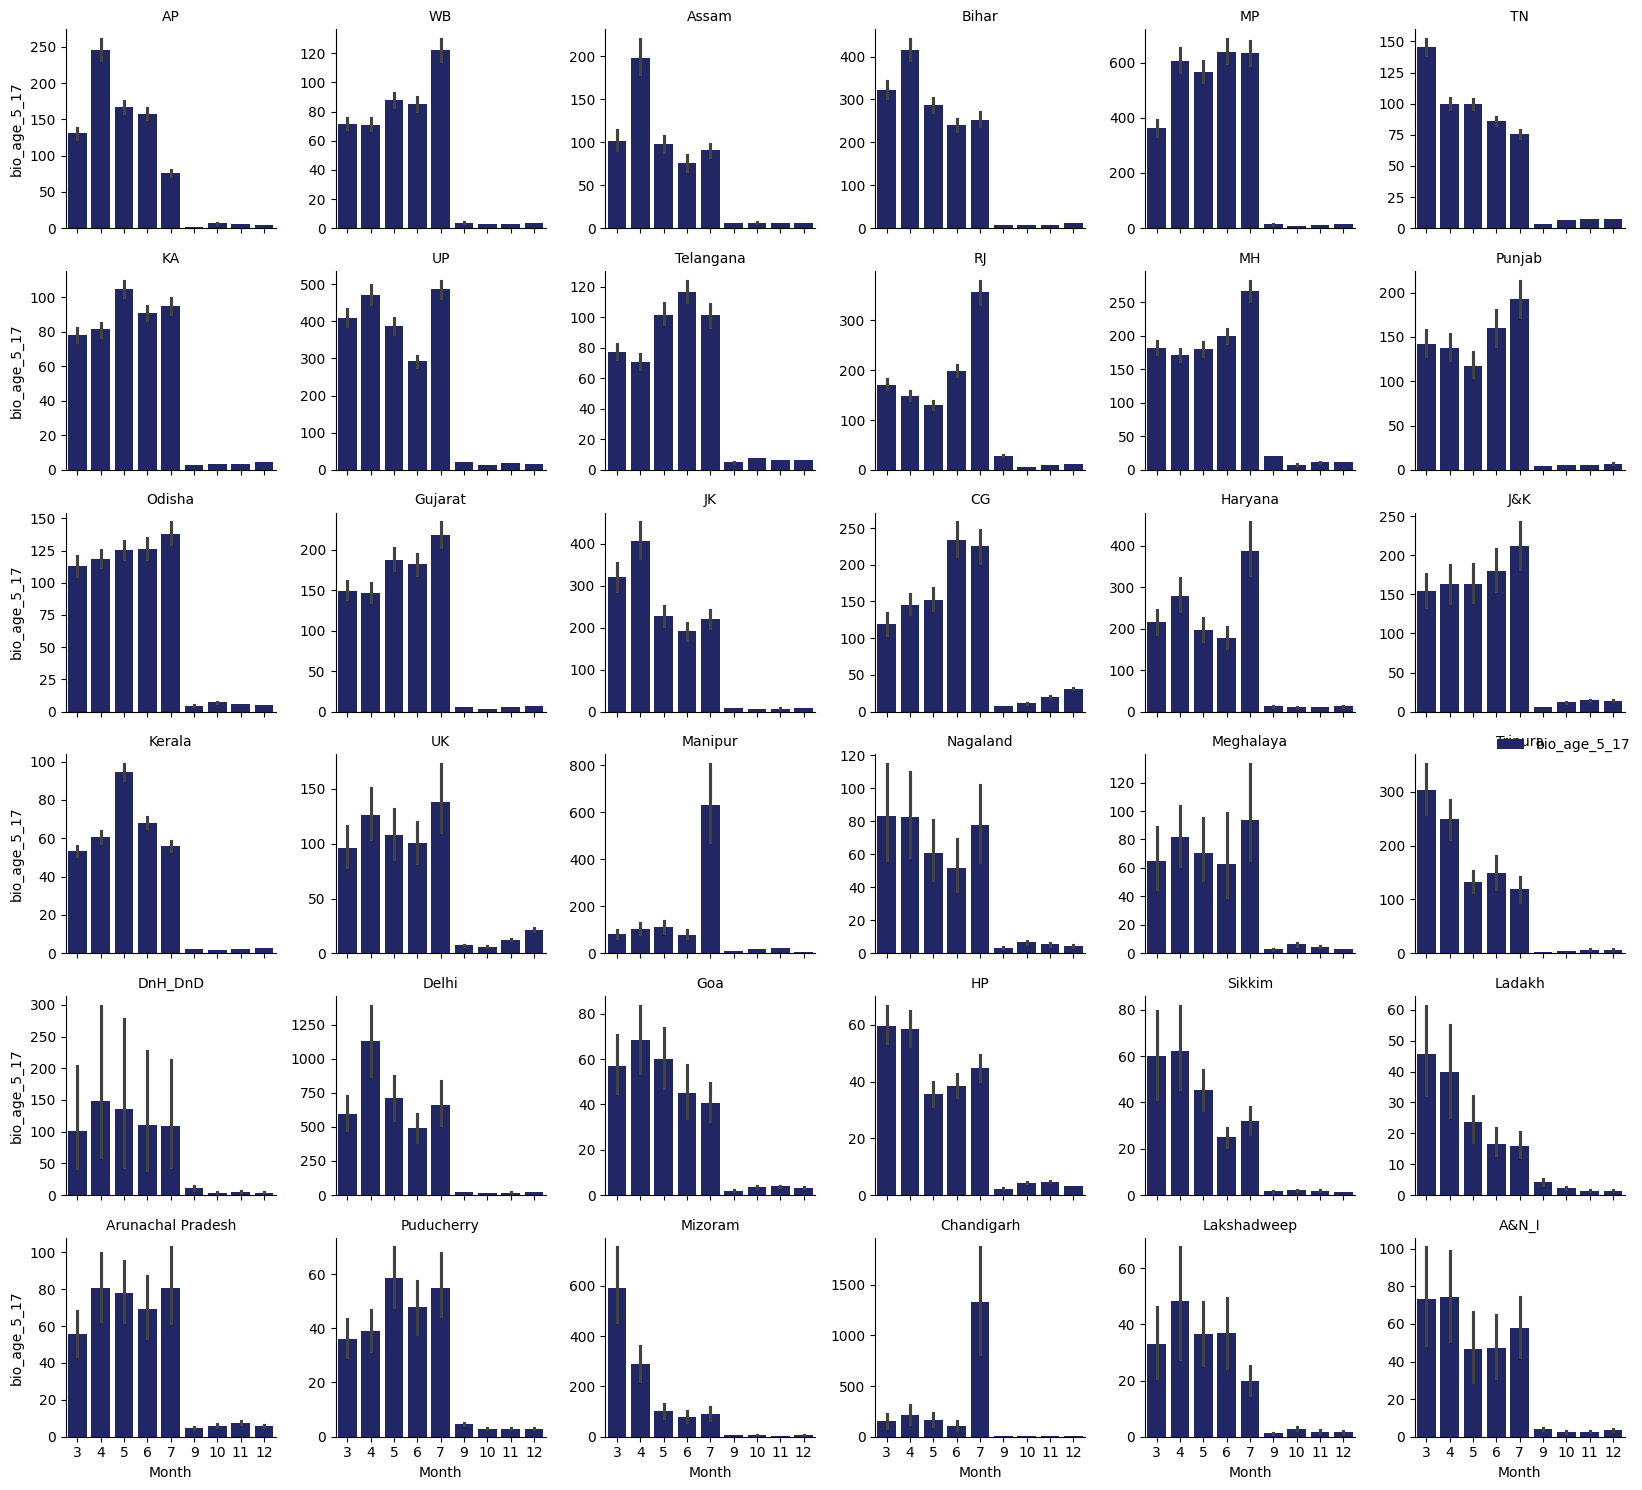

In [65]:
df_long = df.melt(id_vars=['state', 'month'],value_vars=[ 'bio_age_5_17'],var_name='age_group',value_name='enrolled')
df_long = df_long.sort_values('month')

palette = {'bio_age_5_17': '#161D6F'}
g = sns.FacetGrid(df_long,col='state',col_wrap=6,height=2.5,sharey=False )
g.map_dataframe(sns.barplot,x='month',y='enrolled',hue='age_group',palette =palette)

g.add_legend()
g.set_axis_labels('Month', 'bio_age_5_17')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

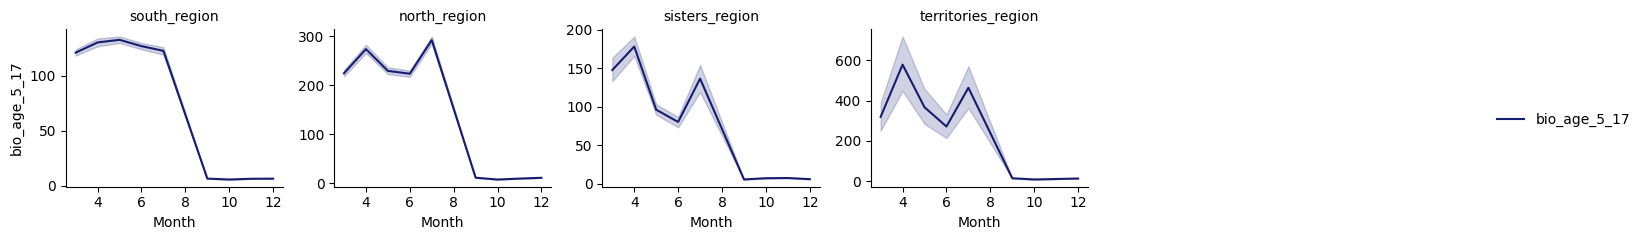

In [66]:
df_long = df.melt(id_vars=['regions', 'month'],value_vars=[ 'bio_age_5_17'],var_name='age_group',value_name='enrolled')
df_long = df_long.sort_values('month')

palette = {'bio_age_5_17': '#161D6F'}
g = sns.FacetGrid(df_long,col='regions',col_wrap=6,height=2.5,sharey=False )
g.map_dataframe(sns.lineplot,x='month',y='enrolled',hue='age_group',palette =palette)

g.add_legend()
g.set_axis_labels('Month', 'bio_age_5_17')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

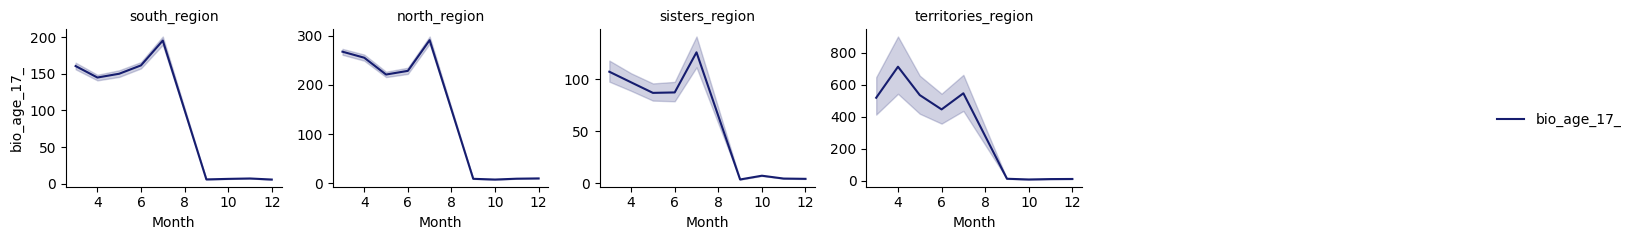

In [67]:
df_long = df.melt(id_vars=['regions', 'month'],value_vars=[ 'bio_age_17_'],var_name='age_group',value_name='enrolled')
df_long = df_long.sort_values('month')

palette = {'bio_age_17_': '#161D6F'}
g = sns.FacetGrid(df_long,col='regions',col_wrap=6,height=2.5,sharey=False )
g.map_dataframe(sns.lineplot,x='month',y='enrolled',hue='age_group',palette =palette)

g.add_legend()
g.set_axis_labels('Month', 'bio_age_17_')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

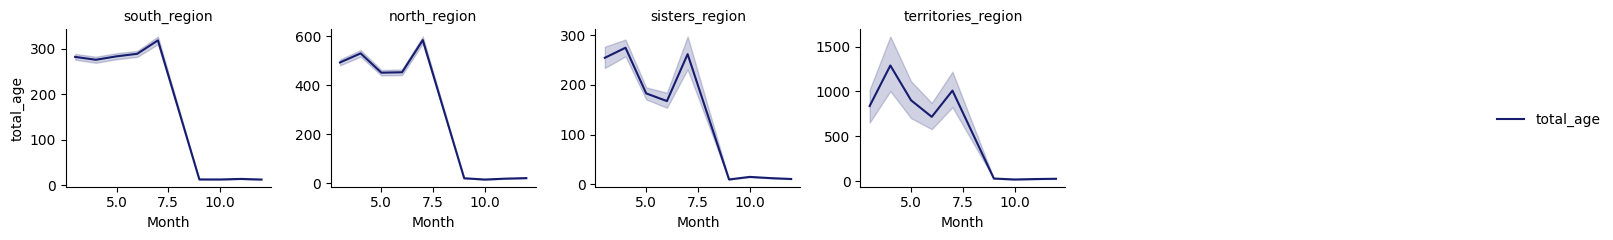

In [68]:
df_long = df.melt(id_vars=['regions', 'month'],value_vars=[ 'total_age'],var_name='age_group',value_name='enrolled')
df_long = df_long.sort_values('month')

palette = {'total_age': '#161D6F'}
g = sns.FacetGrid(df_long,col='regions',col_wrap=6,height=2.5,sharey=False )
g.map_dataframe(sns.lineplot,x='month',y='enrolled',hue='age_group',palette =palette)

g.add_legend()
g.set_axis_labels('Month', 'total_age')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

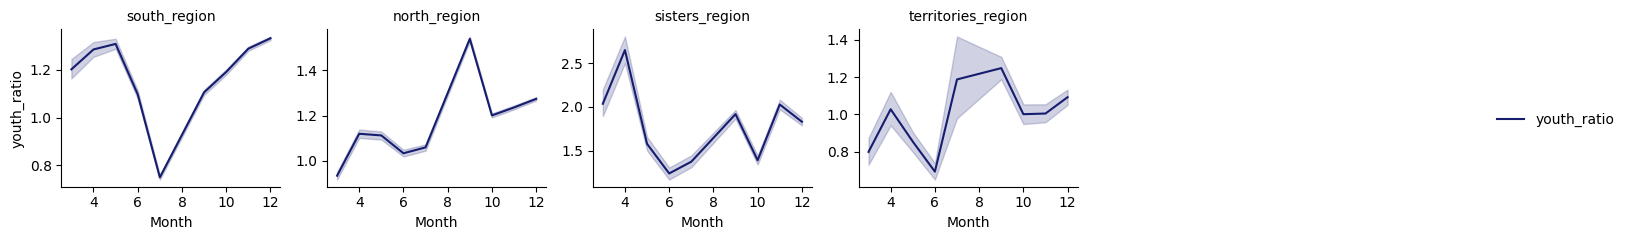

In [69]:
df_long = df.melt(id_vars=['regions', 'month'],value_vars=[ 'youth_ratio'],var_name='age_group',value_name='enrolled')
df_long = df_long.sort_values('month')

palette = {'youth_ratio': '#161D6F'}
g = sns.FacetGrid(df_long,col='regions',col_wrap=6,height=2.5,sharey=False )
g.map_dataframe(sns.lineplot,x='month',y='enrolled',hue='age_group',palette =palette)

g.add_legend()
g.set_axis_labels('Month', 'youth_ratio')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

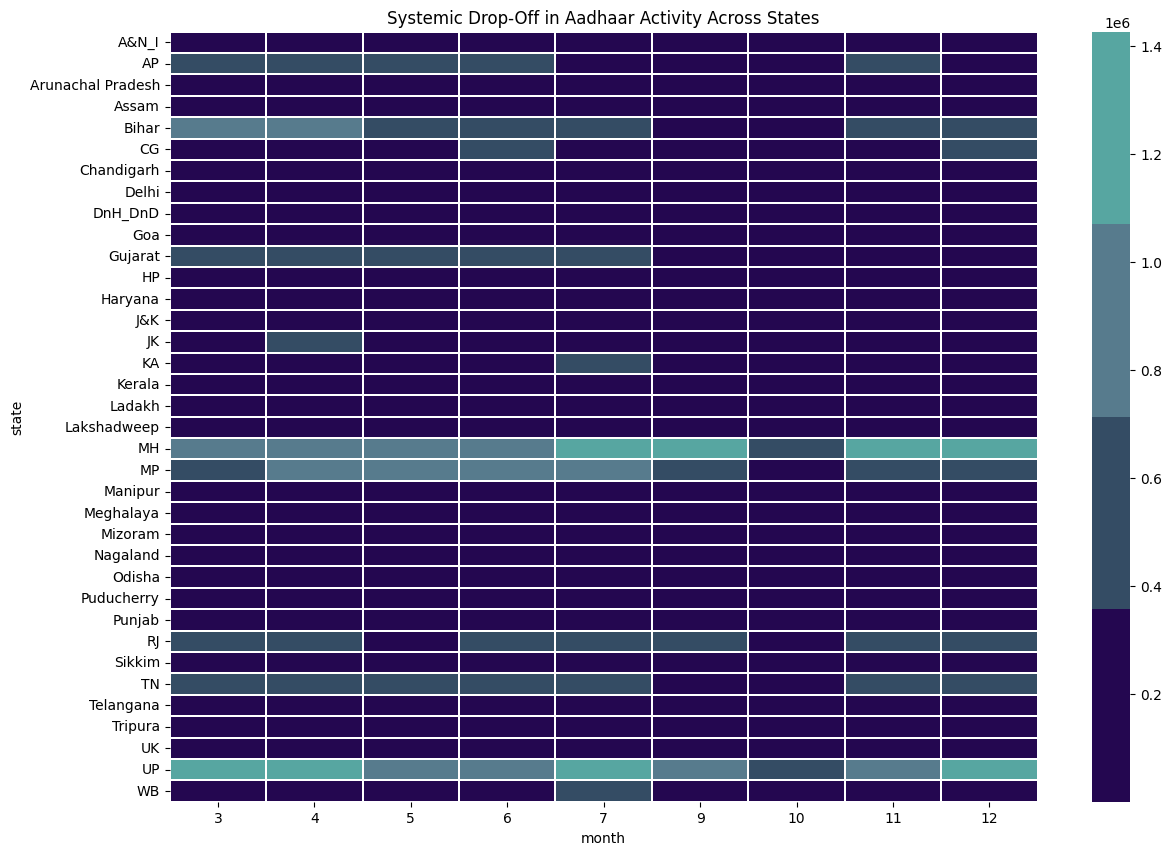

In [70]:
pivot = df.pivot_table( values='total_age', index='state', columns='month', aggfunc='sum')

plt.figure(figsize=(14,10))
sns.heatmap(pivot, cmap = palet, linewidths=0.2)
plt.title("Systemic Drop-Off in Aadhaar Activity Across States")
plt.show()


/tmp/ipython-input-233585519.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='month', y='youth_roll_std', hue='state', legend=False,palette = palet,ci= None )
/tmp/ipython-input-233585519.py:10: UserWarning: 
The palette list has fewer values (4) than needed (36) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x='month', y='youth_roll_std', hue='state', legend=False,palette = palet,ci= None )


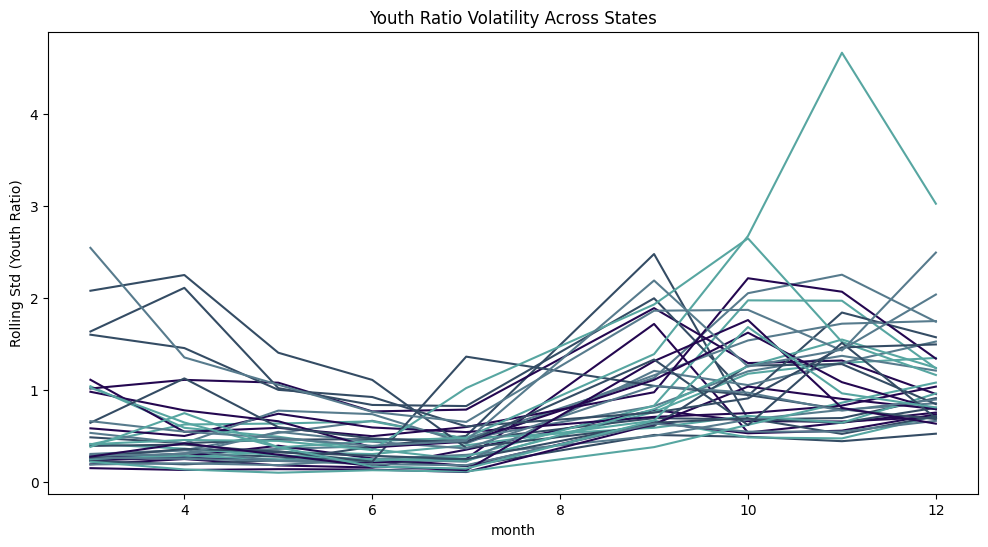

In [71]:
df = df[df['total_age'] > 0]

df['youth_roll_std'] = (
    df.groupby('state')['youth_ratio']
      .rolling(3).std()
      .reset_index(level=0, drop=True)
)

plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='month', y='youth_roll_std', hue='state', legend=False,palette = palet,ci= None )
plt.title("Youth Ratio Volatility Across States")
plt.ylabel("Rolling Std (Youth Ratio)")
plt.show()


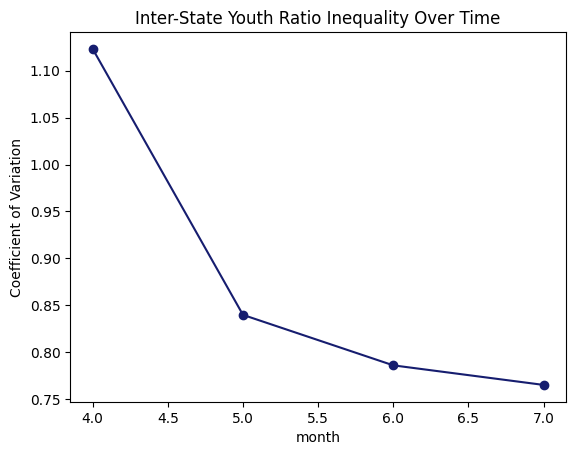

In [72]:
cv_month = df.groupby('month')['youth_ratio'].std() / \
           df.groupby('month')['youth_ratio'].mean()

cv_month.plot(marker='o' ,color = '#161D6F')
plt.title("Inter-State Youth Ratio Inequality Over Time")
plt.ylabel("Coefficient of Variation")
plt.show()


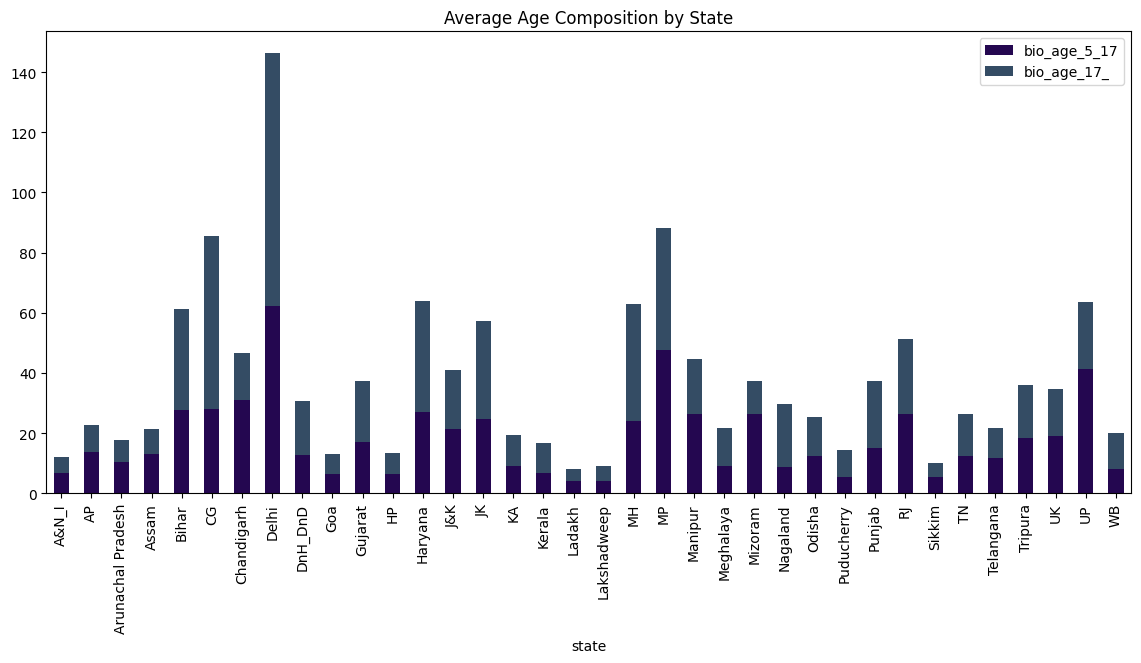

In [73]:
state_avg = df.groupby('state')[['bio_age_5_17','bio_age_17_']].mean()

state_avg.plot(kind='bar',stacked=True,figsize=(14,6) ,color =palet)
plt.title("Average Age Composition by State")
plt.show()


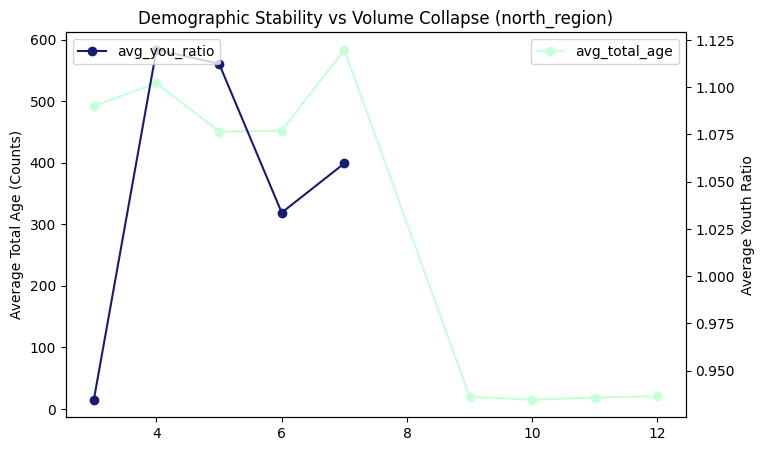

In [74]:
region_month = df.groupby(['regions','month']).agg(
    avg_total_age=('total_age','mean'),
    avg_youth_ratio=('youth_ratio','mean')
).reset_index()

region = 'north_region'
temp = region_month[region_month['regions'] == region]

fig, ax1 = plt.subplots(figsize=(8,5))

ax1.plot(temp['month'], temp['avg_total_age'], marker='o',color ='#C7FFD8',label = 'avg_total_age')
ax1.set_ylabel("Average Total Age (Counts)")
plt.legend()

ax2 = ax1.twinx()
ax2.plot(temp['month'], temp['avg_youth_ratio'], marker='o',color ='#161D6F',label='avg_you_ratio')
ax2.set_ylabel("Average Youth Ratio")
plt.legend(loc='upper left',ncol =1 )


plt.title(f"Demographic Stability vs Volume Collapse ({region})")
plt.show()


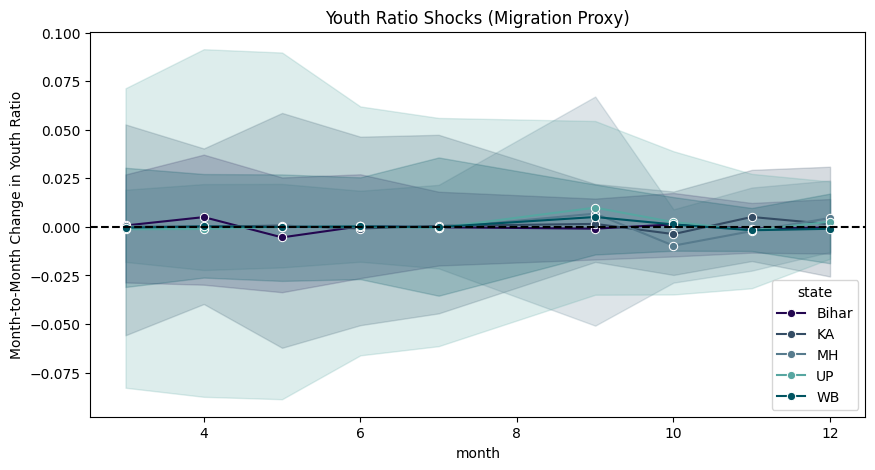

In [75]:
df_sorted = df.sort_values(['state','month'])
df_sorted['youth_ratio_delta'] = (
    df_sorted.groupby('state')['youth_ratio'].diff()
)

focus_states = ['UP', 'MH', 'Bihar', 'KA', 'WB']

temp = df_sorted[df_sorted['state'].isin(focus_states)]

plt.figure(figsize=(10,5))
sns.lineplot(
    data=temp,
    x='month',
    y='youth_ratio_delta',
    hue='state',
    marker='o',
    palette = palet +['#005461']
)

plt.axhline(0, linestyle='--', color='black')
plt.title("Youth Ratio Shocks (Migration Proxy)")
plt.ylabel("Month-to-Month Change in Youth Ratio")
plt.show()
